In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from algorithms import lagrange, spline

In [2]:
data = pd.read_csv("Data/rozne_wniesienia.txt", sep=",", names=['Distance', 'Elevation'])
print(data.head(20))
print(data.tail(2))

       Distance   Elevation
0      0.000000  467.691406
1     83.060665  469.039398
2    166.121331  471.023254
3    249.181996  473.571747
4    332.242661  476.674042
5    415.303327  472.646912
6    498.363992  470.513611
7    581.424658  473.346222
8    664.485323  476.705902
9    747.545988  479.126770
10   830.606654  479.757690
11   913.667319  478.825104
12   996.727984  476.902588
13  1079.788650  475.932983
14  1162.849315  475.384186
15  1245.909980  474.877228
16  1328.970646  474.000000
17  1412.031311  473.996552
18  1495.091977  472.309296
19  1578.152642  471.654541
         Distance   Elevation
510  42360.939335  471.285217
511  42444.000000  475.677978


In [88]:
data_matrix = pd.read_csv("Data/rozne_wniesienia.txt", sep=",", names=['Distance', 'Elevation']).to_numpy()

dataset = []
for file in os.listdir("Data"):
    dataset.append(pd.read_csv("Data/stale.txt", sep=",", names=['Distance', 'Elevation']).to_numpy())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


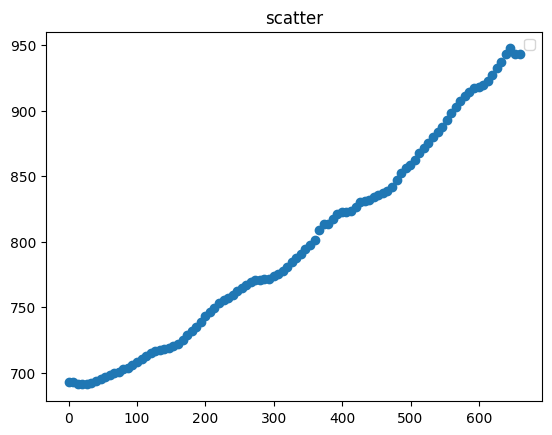

In [89]:
data_matrix = dataset[0]
plt.title(f"scatter")
plt.scatter(data_matrix[:100, 0], data_matrix[:100, 1])
plt.legend()
plt.show()

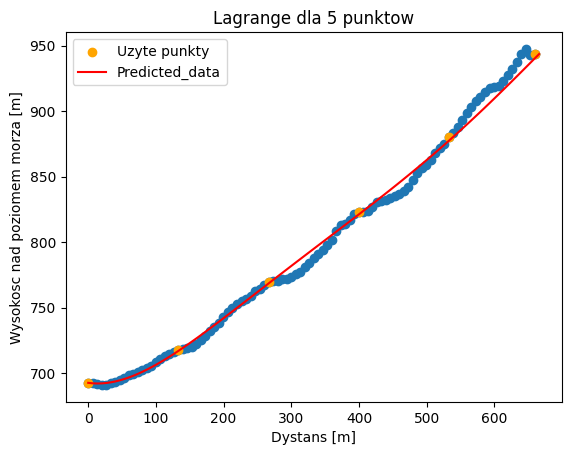

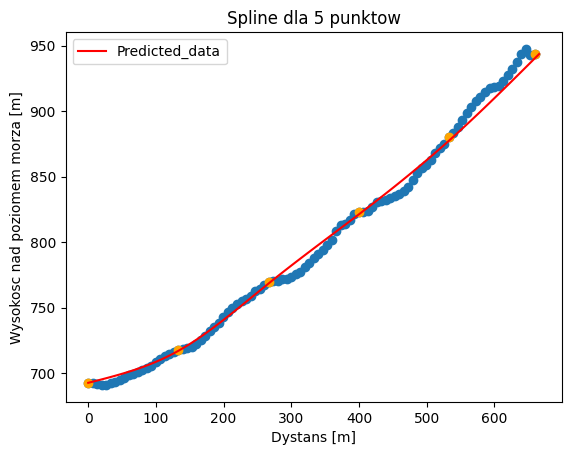

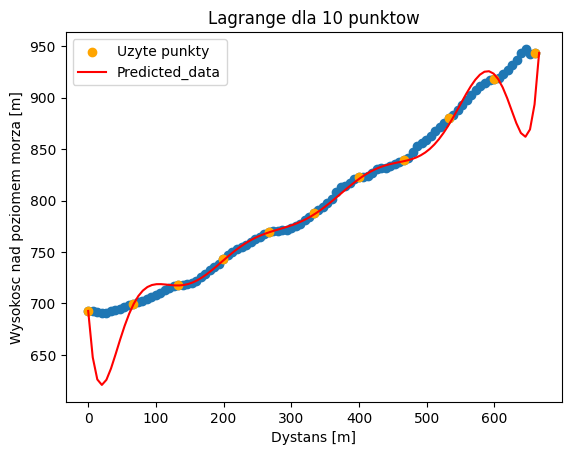

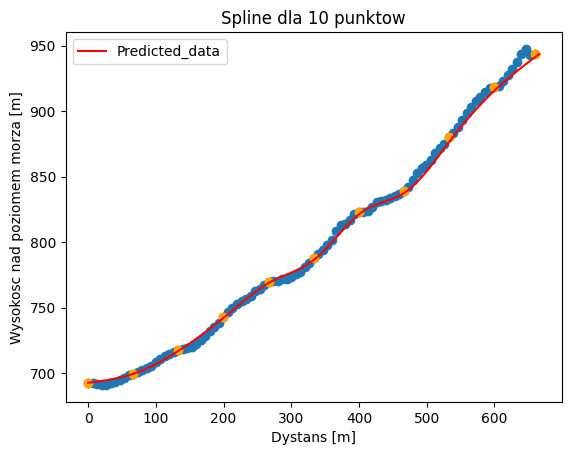

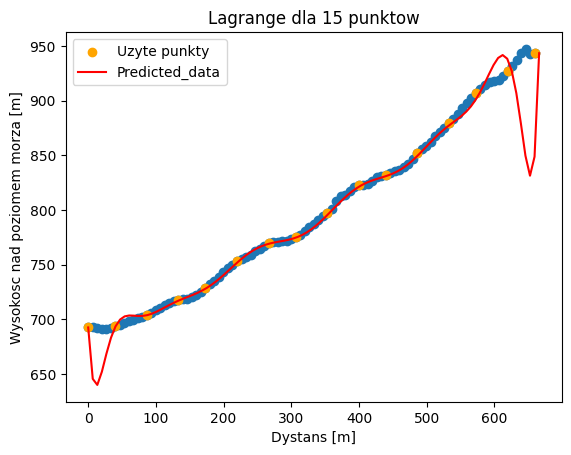

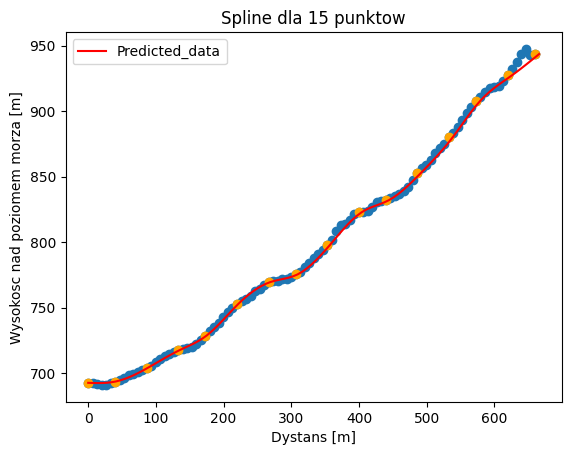

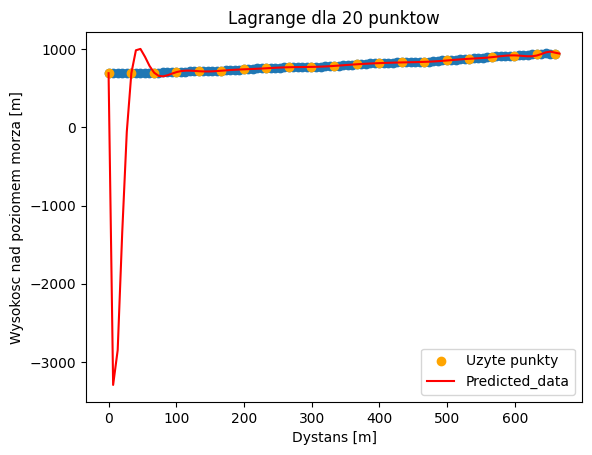

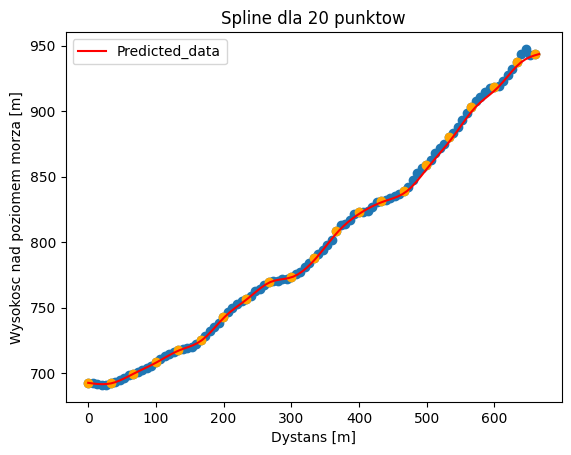

In [79]:
K = [5,10,15,20]
MAX_SIZE = 100

for k in K:
    x = []
    y = []
    for i in range(k):
        x.append(data_matrix[int(i*MAX_SIZE/k)][0])
        y.append(data_matrix[int(i*MAX_SIZE/k)][1])
    x.append(data_matrix[MAX_SIZE-1, 0])
    y.append(data_matrix[MAX_SIZE-1, 1])

    y_pred_lagrange = np.zeros(MAX_SIZE)
    y_pred_spline = np.zeros(MAX_SIZE)
    for i in range(MAX_SIZE):
        y_pred_lagrange[i] = lagrange(x, y, data_matrix[i, 0])
        y_pred_spline[i] = spline(x, y, data_matrix[i, 0])
    
    plt.figure()
    plt.title(f"Lagrange dla {k} punktow")
    plt.xlabel("Dystans [m]")
    plt.ylabel("Wysokosc nad poziomem morza [m]")
    plt.scatter(data_matrix[:MAX_SIZE, 0], data_matrix[:MAX_SIZE, 1])
    plt.scatter(x, y, color='orange', label="Uzyte punkty")
    plt.plot(np.linspace(0, data_matrix[MAX_SIZE, 0], MAX_SIZE), y_pred_lagrange, 'r', label="Predicted_data")
    plt.legend()
    plt.show()

    plt.title(f"Spline dla {k} punktow")
    plt.xlabel("Dystans [m]")
    plt.ylabel("Wysokosc nad poziomem morza [m]")
    plt.scatter(data_matrix[:MAX_SIZE, 0], data_matrix[:MAX_SIZE, 1])
    plt.scatter(x, y, color='orange')
    plt.plot(np.linspace(0, data_matrix[MAX_SIZE, 0], MAX_SIZE), y_pred_spline, 'r', label="Predicted_data")
    plt.legend()
    plt.show()
